In [3]:
import pandas as pd
import numpy as np


In [29]:
df = pd.read_csv('ABC_company.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis.

In [19]:
df = pd.read_csv('ABC_company.csv')
df
df['Height']=np.random.randint(150,181,df.shape[0])
print(df['Height'].describe())


count    458.000000
mean     164.478166
std        8.929616
min      150.000000
25%      157.000000
50%      164.000000
75%      172.000000
max      180.000000
Name: Height, dtype: float64


1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees

In [25]:

Team_dist= df['Team'].value_counts()
Team_percentage=(Team_dist/len(df))*100
print(Team_percentage)

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

2. Segregate employees based on their positions within the company. 

In [33]:
position = df.groupby('Position')['Name'].count()
print(position)

Position
C      79
PF    100
PG     92
SF     85
SG    102
Name: Name, dtype: int64


3. Identify the predominant age group among employees.

In [47]:
bins=[20,30,40,50,60]
age_groups=pd.cut(df['Age'],bins=bins)
pred_age=age_groups.value_counts().idxmax()
print(pred_age)

(20, 30]


4. Discover which team and position have the highest salary expenditure. 

In [51]:
high_salary_position=df.groupby(['Team','Position'])['Salary']
max_salary=high_salary_position.idxmax()
print(max_salary)

Team                Position
Atlanta Hawks       C           312
                    PF          315
                    PG          323
                    SF          320
                    SG          314
                               ... 
Washington Wizards  C           375
                    PF          376
                    PG          382
                    SF          378
                    SG          369
Name: Salary, Length: 149, dtype: int64


5. Investigate if there's any correlation between age and salary, and represent it visually.

In [57]:
import matplotlib.pyplot as plt
correlation=df['Age'].corr(df['Salary'])
print(f"Correlation between age and salary:{correlation}")

Correlation between age and salary:0.21400941226570974


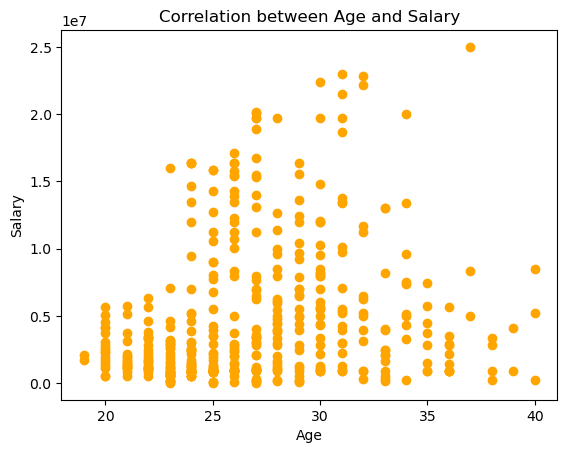

In [73]:
plt.scatter(df['Age'],df['Salary'],color='orange')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title("Correlation between Age and Salary")
plt.show()

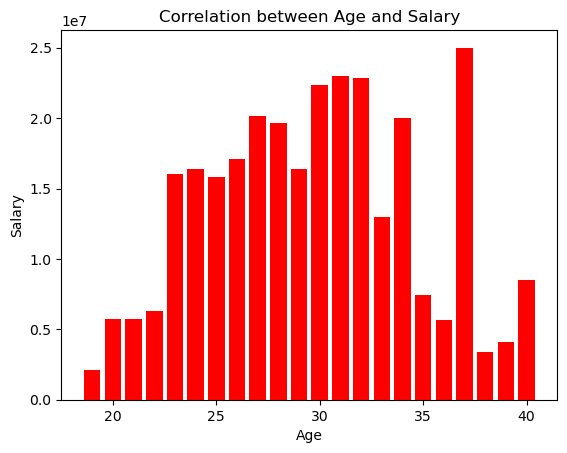

In [77]:
plt.bar(df['Age'],df['Salary'],color='red')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title("Correlation between Age and Salary")
plt.show()

GRAPHICAL REPRESENTATION
For each of the five analysis tasks, create appropriate visualizations to present your findings effectively. 

visualization 1

Text(0, 0.5, 'Number of Employees')

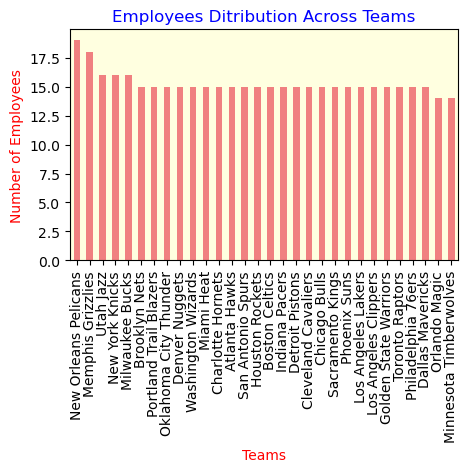

In [273]:
plt.figure(figsize=(5, 3))
Team_dist=df['Team'].value_counts()
Team_dist.plot(kind='bar',color='lightcoral')
plt.gca().set_facecolor('lightyellow')
plt.title("Employees Ditribution Across Teams",color='blue')
plt.xlabel('Teams',color='red')
plt.ylabel('Number of Employees',color='red')


visualization 2

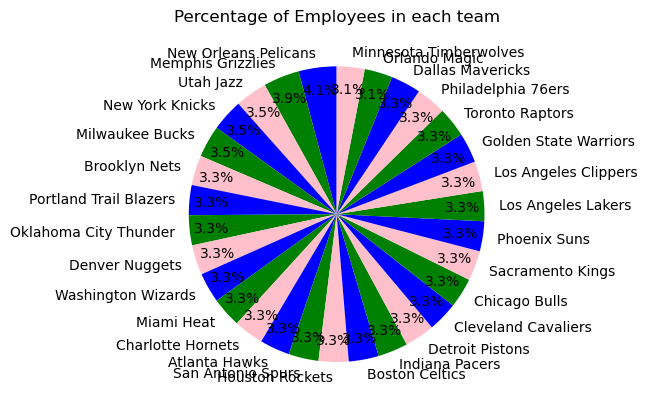

In [153]:
Team_percentage=(Team_dist/len(df))*100

Team_percentage.plot(kind='pie',autopct='%1.1f%%', pctdistance=0.85,startangle=90,colors=['blue','green','pink'])


plt.title("Percentage of Employees in each team")

plt.ylabel('')
plt.show()

visualization 3

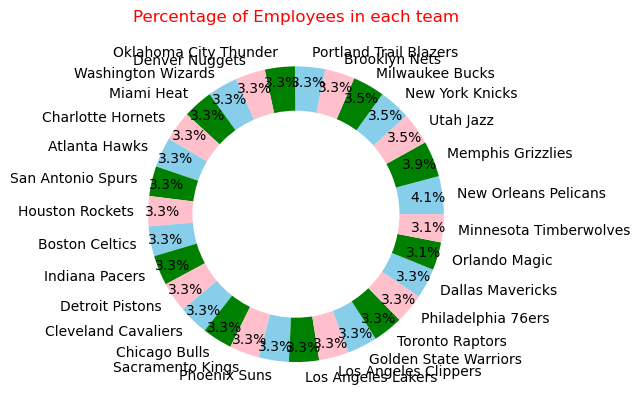

In [179]:
Team_percentage=(Team_dist/len(df))*100

Team_percentage.plot(kind='pie',autopct='%1.1f%%', pctdistance=0.90,colors=['skyblue','green','pink'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
fig.gca().add_artist(centre_circle)

plt.title("Percentage of Employees in each team",color='red')

plt.ylabel('')
plt.show()


In [ ]:
visualization 4

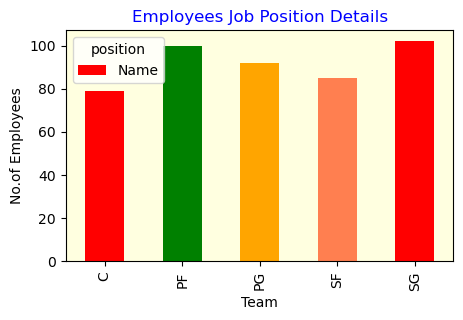

In [205]:
plt.figure(figsize=(5, 3))
position = df.groupby('Position')['Name'].count()
position. plot(kind='bar',stacked='True',color=['red','green','orange','coral'])
plt.gca().set_facecolor('lightyellow')
plt.title("Employees Job Position Details",color='blue')
plt.xlabel('Team')
plt.ylabel('No.of Employees')
plt.legend(title='position')
plt.show()

In [ ]:
visualization 5

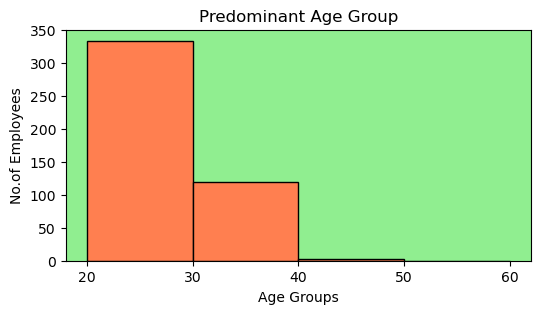

In [223]:
plt.figure(figsize=(6,3))
bins=[20,30,40,50,60]
plt.hist(df['Age'],bins=bins,color='coral',edgecolor='black')
plt.gca().set_facecolor('lightgreen')
plt.title("Predominant Age Group")
plt.xlabel("Age Groups")
plt.ylabel("No.of Employees")
plt.xticks(bins)
plt.show()

In [ ]:
visulaization 6

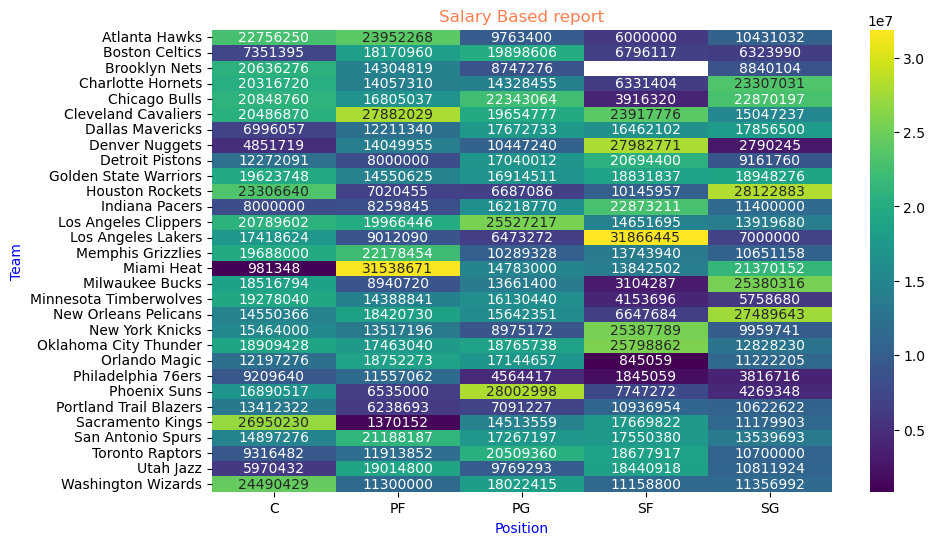

In [261]:
import seaborn as snc

high_salary_position=df.groupby(['Team','Position'])['Salary'].sum().unstack()
plt.figure(figsize=(10,6))
snc.heatmap(high_salary_position,cmap='viridis',annot=True,fmt='.0f')
plt.title("Salary Based report",color='coral')
plt.xlabel('Position',color='blue')
plt.ylabel('Team',color='blue')
plt.show()

In [ ]:
visalization 7

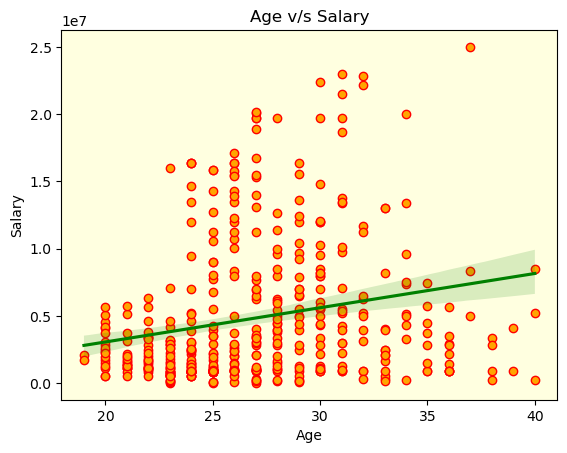

In [269]:
plt.scatter(df['Age'],df['Salary'],color='orange',edgecolor='red')
plt.gca().set_facecolor('lightyellow')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title("Age v/s Salary")
snc.regplot(x='Age',y='Salary' ,data=df,scatter=False,color='green') 
plt.show()